# <h1 align='center'>Task 4- Decision tree Classifier on Iris dataset</h1>





##  <h2 align='center'>By</h2>



 
##  <h3 align='center'>Rohit Joshi</h3>








In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# data loading
data = pd.read_csv("iris.csv")
data.drop('Id',axis=1,inplace=True)
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
data.Species.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

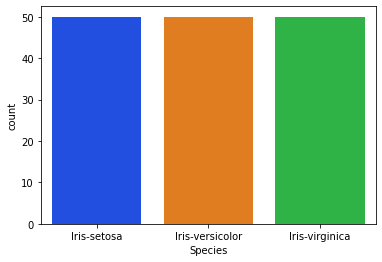

In [4]:
# class distribution 
plt.figure()
ax = plt.gca()
sns.countplot(data['Species'],palette='bright',color='viridis',ax= ax);
plt.show()

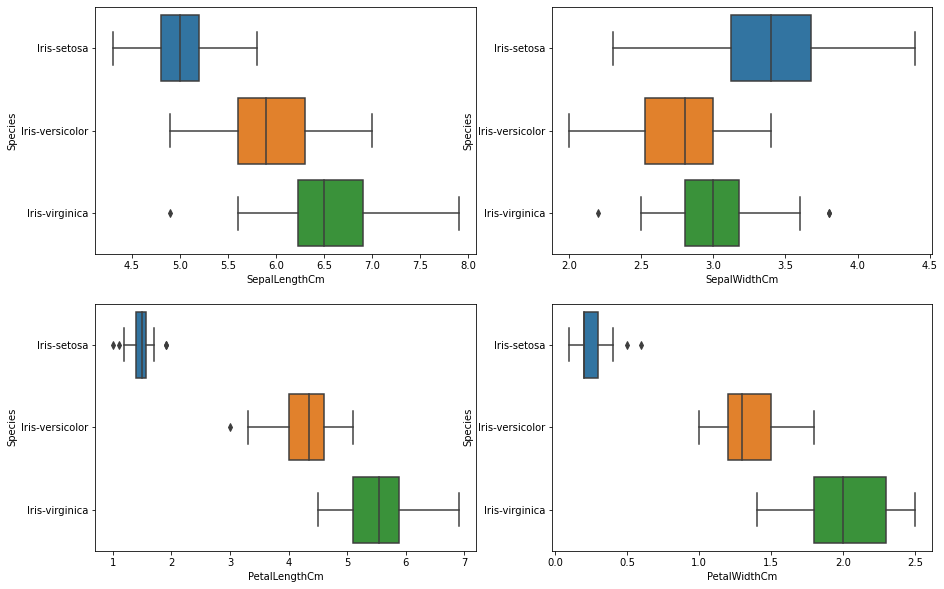

In [27]:

figure,axes = plt.subplots(2,2,figsize=(15,10))
axes =axes.flatten()
for ax,col in zip(axes,data.columns):
    sns.boxplot(x=col,y='Species',data=data,ax=ax)
    ax.set_xlabel(col)
plt.show()

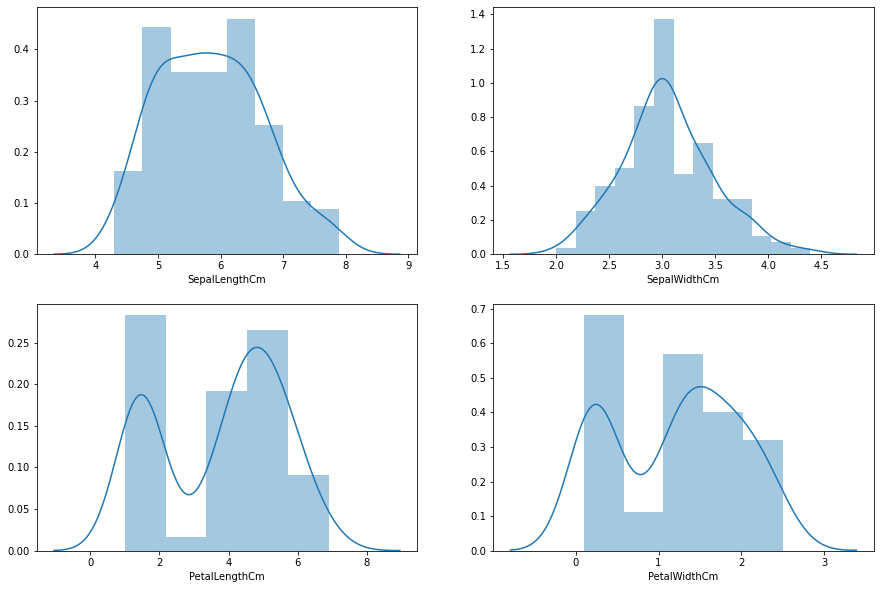

In [35]:

figure,axes = plt.subplots(2,2,figsize=(15,10))
axes =axes.flatten()

for ax,col in zip(axes,data.columns):
    sns.distplot(data[col],ax=ax)
    ax.set_xlabel(col)
plt.show()

# Model development

In [184]:
from sklearn.model_selection import train_test_split
X_train, X_test,y_train,y_test = train_test_split(data.iloc[:,[0,1,2,3]],data.iloc[:,-1],test_size=0.20,random_state=0)

In [187]:
#Grid search and cv

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report,confusion_matrix

model = DecisionTreeClassifier()
model.fit(X_train,y_train)

print("Train score: {}".format(model.score(X_train,y_train)))
print("Test score: {}".format(model.score(X_test,y_test)))
pred = model.predict(X_test)
print(classification_report(y_test,pred))
print(confusion_matrix(y_test,pred))


Train score: 1.0
Test score: 1.0
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      1.00      1.00        13
 Iris-virginica       1.00      1.00      1.00         6

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30

[[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]


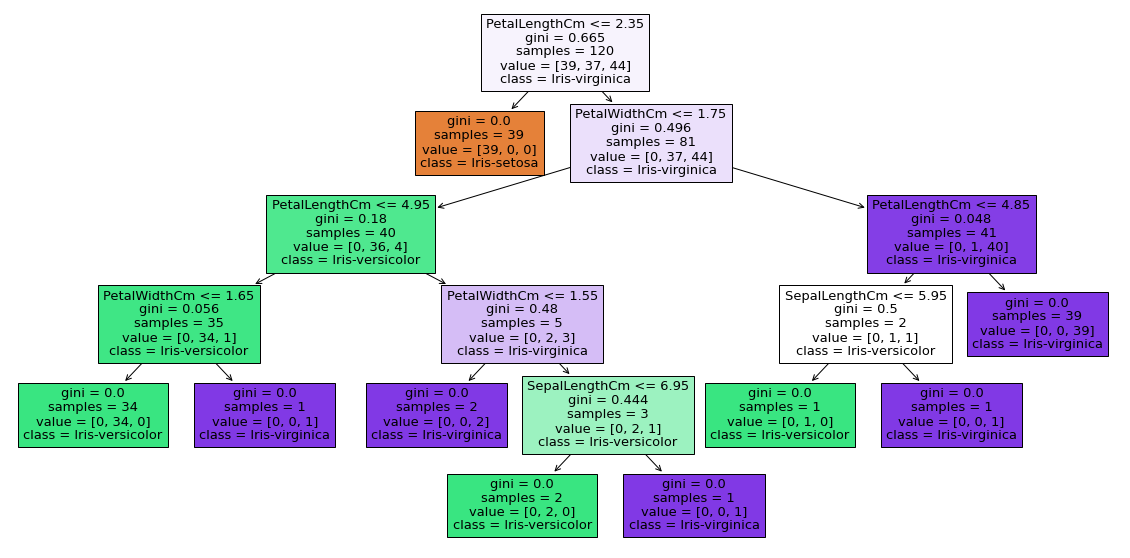

In [188]:
#printing decision tree graph

from sklearn.tree import plot_tree

plt.figure(figsize=(20,10))
_ = plot_tree(model,feature_names =[i for i in data.columns if i !='Species'],
              class_names=data['Species'].unique(),
             filled=True)


In [189]:
plt.savefig("Iris.png")

<Figure size 432x288 with 0 Axes>